In [14]:
import os
import pandas as pd
import uproot

In [15]:
#backgrounds(ggJets, and gJetPt)

background_files = [
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

In [16]:
# Columns to be loaded
keys = [
     'bbgg_mass', 'dibjet_mass', 'diphoton_mass', 
]

In [17]:
# Load DataFrames
dfs = {}

# Load background files
for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

In [18]:
dfs

{'/NMSSM_X300_Y60/preselection':         bbgg_mass  dibjet_mass  diphoton_mass
 0      489.111876   248.605869     126.142750
 1      249.527711    92.932634     125.381988
 2      402.915738   174.895425     126.186253
 3      286.066702    51.287356     125.581578
 4      253.873069    40.892432     124.638337
 ...           ...          ...            ...
 23185  268.739135    69.052969     124.987924
 23186  327.786139    75.154129     122.454640
 23187  244.756454    39.125181     126.173747
 23188  575.203079   260.991588     126.420015
 23189  399.299198   242.018538     124.265493
 
 [23190 rows x 3 columns],
 '/NMSSM_X650_Y90/preselection':         bbgg_mass  dibjet_mass  diphoton_mass
 0      638.972191    89.415366     124.903216
 1      624.541801    49.059485     123.285659
 2      528.802326    56.460631      99.329899
 3      600.257328    74.074307     123.059525
 4      598.603963    78.498714     124.185346
 ...           ...          ...            ...
 33529  859.72

In [ ]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames
dfs = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'bbgg_mass'
bins = 50  # Number of bins
range_min, range_max = 0, 2000  # Define the range for the histograms
colors = ['red', 'blue', 'green']  # Define colors for each histogram
labels = ['X300_Y60', 'X650_Y90', 'X1200_Y200']  # Define labels

plt.figure(figsize=(10, 7))

for idx, (key, df) in enumerate(dfs.items()):
    # Extract the variable and plot the histogram
    data = df[variable]
    plt.hist(
        data,
        bins=bins,
        range=(range_min, range_max),
        histtype='step',
        linewidth=2,
        color=colors[idx],
        label=labels[idx],
    )

# CMS Style
plt.title(r"CMS Preliminary, $\sqrt{s}$ = 13 TeV", fontsize=16, loc='left', pad=20)
plt.title("Luminosity: 137 fb$^{-1}$", fontsize=14, loc='right', pad=20)
plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14)
plt.ylabel("Events", fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

plt.ylim(0, None)
plt.tight_layout()
# plt.savefig("overlay_histograms_cms_style.png")  # Save the figure
plt.show()


In [ ]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Set CMS style
hep.style.use("CMS")

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
    
    
]
signal_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames
dfs = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'bbgg_mass'
bins = np.linspace(0, 2000, 51)  # Define bins (edges from 0 to 2000 GeV)
colors = ['red', 'blue', 'green']  # Colors for each histogram
labels = [r"NMSSM $X_{300}Y_{60}$", r"NMSSM $X_{650}Y_{90}$", r"NMSSM $X_{1200}Y_{200}$"]  # Labels for datasets

plt.figure(figsize=(10, 7))

# Loop through each dataset and plot
for idx, (key, df) in enumerate(dfs.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, bin_edges = np.histogram(data, bins=bins)  # Bin the data
    hep.histplot(
        counts,
        bins=bin_edges,
        histtype='step',
        color=colors[idx],
        label=labels[idx],
        linewidth=2,
    )

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.ylabel("Events", fontsize=14, style='italic')  # Italic y-label

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/overlay_histograms_bbgg_mass.png")  # Save as PNG
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/overlay_histograms_bbgg_mass.pdf")  # Save as PDF
plt.show()


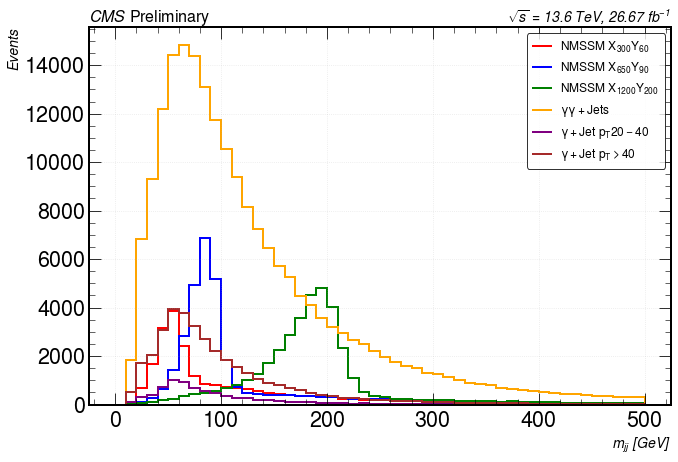

In [7]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Set CMS style
hep.style.use("CMS")

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames
dfs = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'dibjet_mass'
bins = np.linspace(0, 500, 51)  # Define bins (edges from 0 to 2000 GeV)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # Colors for each histogram
labels = [
    r"NMSSM $X_{300}Y_{60}$",
    r"NMSSM $X_{650}Y_{90}$",
    r"NMSSM $X_{1200}Y_{200}$",
    r"$\gamma\gamma+Jets$",
    r"$\gamma+Jet\ p_{T} 20-40$",
    r"$\gamma+Jet\ p_{T} > 40$",
]  # Labels for datasets

plt.figure(figsize=(10, 7))

# Loop through each dataset and plot
for idx, (key, df) in enumerate(dfs.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, bin_edges = np.histogram(data, bins=bins)  # Bin the data
    hep.histplot(
        counts,
        bins=bin_edges,
        histtype='step',
        color=colors[idx],
        label=labels[idx],
        linewidth=2,
    )

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

# plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.xlabel(r"$m_{jj}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.ylabel("Events", fontsize=14, style='italic')  # Italic y-label

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/overlay_histograms_bbgg_mass_background.png")  # Save as PNG
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/overlay_histograms_bbgg_mass_background.pdf")  # Save as PDF
plt.show()


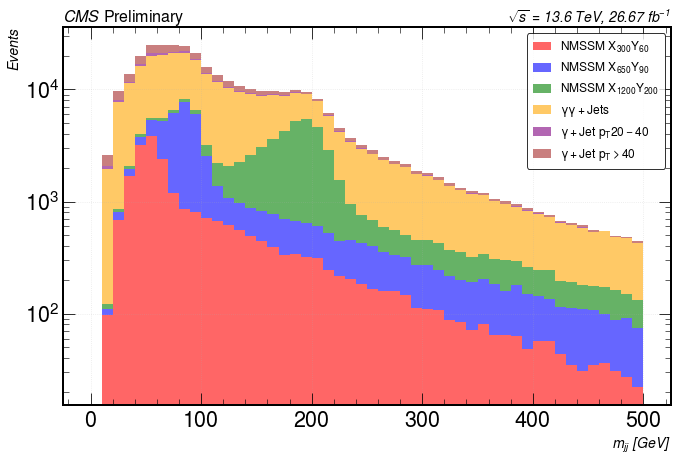

In [5]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Set CMS style
hep.style.use("CMS")

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames
dfs = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'dibjet_mass'
bins = np.linspace(0, 500, 51)  # Define bins (edges from 0 to 2000 GeV)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # Colors for each histogram
labels = [
    r"NMSSM $X_{300}Y_{60}$",
    r"NMSSM $X_{650}Y_{90}$",
    r"NMSSM $X_{1200}Y_{200}$",
    r"$\gamma\gamma+Jets$",
    r"$\gamma+Jet\ p_{T} 20-40$",
    r"$\gamma+Jet\ p_{T} > 40$",
]  # Labels for datasets

plt.figure(figsize=(10, 7))

# Prepare data for stacking
stacked_counts = []
for idx, (key, df) in enumerate(dfs.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, _ = np.histogram(data, bins=bins)  # Bin the data
    stacked_counts.append(counts)

# Plot stacked histograms
hep.histplot(
    stacked_counts,
    bins=bins,
    histtype='fill',  # Use filled bars for the stacked plot
    color=colors,
    alpha=0.6,
    label=labels,
    stack=True,  # Enable stacking
    linewidth=0.5,
)

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

plt.xlabel(r"$m_{jj}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.yscale('log')
plt.ylabel("Events", fontsize=14, style='italic')  # Italic y-label

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/stacked_histograms_dibjet_mass.png")  # Save as PNG
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/stacked_histograms_dibjet_mass.pdf")  # Save as PDF
plt.show()


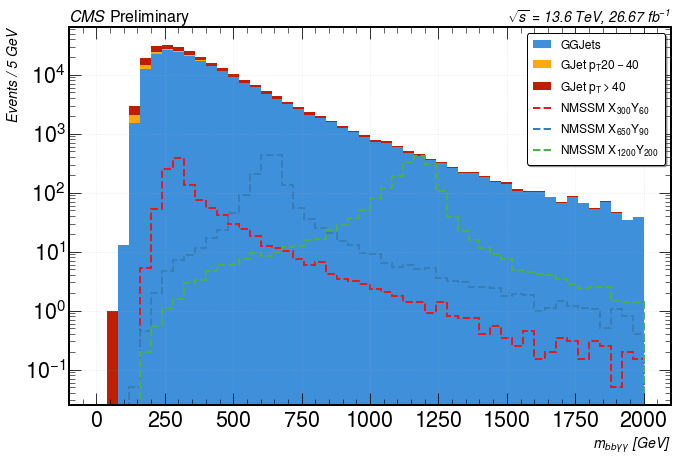

In [11]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from cycler import cycler

# Set CMS style
hep.style.use("CMS")
plt.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "#3f90da", "#ffa90e", "#bd1f01", "#94a4a2",
        "#832db6", "#a96b59", "#e76300", "#b9ac70",
        "#717581", "#92dadd",
    ]
)

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
]

# Signal files and paths
signal_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames for background and signal
dfs_background = {}
dfs_signal = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs_background[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

for file, key in signal_files:
    try:
        with uproot.open(file) as f:
            dfs_signal[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'bbgg_mass'
bins = np.linspace(0, 2000, 51)  # Define bins (edges from 0 to 2000 GeV)
labels_background = [
    r"GGJets",
    r"GJet $p_{T} 20-40$",
    r"GJet $p_{T} > 40$",
]  # Labels for background datasets
labels_signal = [
    r"NMSSM $X_{300}Y_{60}$",
    r"NMSSM $X_{650}Y_{90}$",
    r"NMSSM $X_{1200}Y_{200}$",
]  # Labels for signal datasets

# Prepare background data for stacking
stacked_counts = []
for idx, (key, df) in enumerate(dfs_background.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, _ = np.histogram(data, bins=bins)  # Bin the data
    stacked_counts.append(counts)

# Plot stacked histograms for background
plt.figure(figsize=(10, 7))

hep.histplot(
    stacked_counts,
    bins=bins,
    histtype='fill',  # Use filled bars for the stacked plot
    stack=True,  # Enable stacking
    linewidth=0.5,
    label=labels_background  # Add labels for the background datasets
)

# Define a color list for signal histograms (matching the background colors)
signal_colors = plt.cm.Set1.colors  # You can pick a suitable colormap or manually set the colors

# Scale the signal histograms and overlay them
scaling_factor = 0.05  # Adjust scaling factor for signal visibility
for idx, (key, df) in enumerate(dfs_signal.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, bin_edges = np.histogram(data, bins=bins)  # Bin the data
    scaled_counts = counts * scaling_factor  # Scale the signal counts
    hep.histplot(
        scaled_counts,
        bins=bin_edges,
        histtype='step',  # Overlay signal with steps
        color=signal_colors[idx % len(signal_colors)],  # Explicit color for signal
        label=labels_signal[idx],
        linewidth=2,
        linestyle='--',  # Dashed line for signal histograms
    )

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.ylabel("Events / 5 GeV", fontsize=14, style='italic')  # Italic y-label

# Set log scale
plt.yscale('log')

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True, shadow=True)

# Add grid with reduced alpha for a more subtle effect
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/stacked_background_overlay_signal_log_optimized_with_legend.png")  # Save as PNG
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/stacked_background_overlay_signal_log_optimized_with_legend.pdf")  # Save as PDF
plt.show()


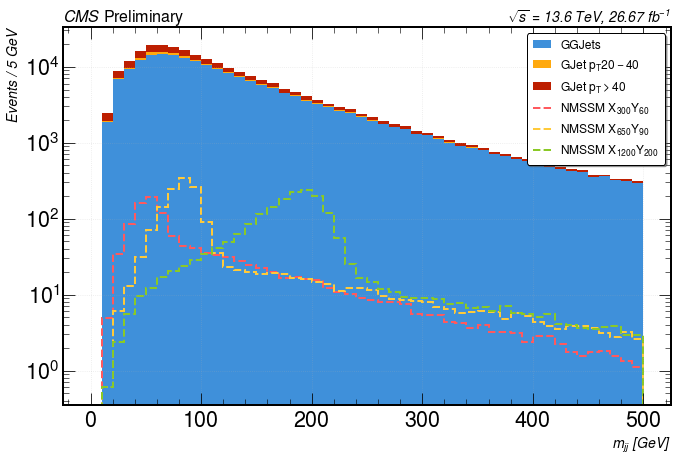

In [14]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from cycler import cycler

# Set CMS style
hep.style.use("CMS")
plt.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "#3f90da", "#ffa90e", "#bd1f01", "#94a4a2",
        "#832db6", "#a96b59", "#e76300", "#b9ac70",
        "#717581", "#92dadd",
    ]
)

# Background files and paths
background_files = [
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
]

# Signal files and paths
signal_files = [
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames for background and signal
dfs_background = {}
dfs_signal = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs_background[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

for file, key in signal_files:
    try:
        with uproot.open(file) as f:
            dfs_signal[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Overlay histograms for 'bbgg_mass'
variable = 'dibjet_mass'
bins = np.linspace(0, 500, 51)  # Define bins (edges from 0 to 2000 GeV)
labels_background = [
    r"GGJets",
    r"GJet $p_{T} 20-40$",
    r"GJet $p_{T} > 40$",
]  # Labels for background datasets
labels_signal = [
    r"NMSSM $X_{300}Y_{60}$",
    r"NMSSM $X_{650}Y_{90}$",
    r"NMSSM $X_{1200}Y_{200}$",
]  # Labels for signal datasets

# Prepare background data for stacking
stacked_counts = []
for idx, (key, df) in enumerate(dfs_background.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, _ = np.histogram(data, bins=bins)  # Bin the data
    stacked_counts.append(counts)

# Plot stacked histograms for background
plt.figure(figsize=(10, 7))

hep.histplot(
    stacked_counts,
    bins=bins,
    histtype='fill',  # Use filled bars for the stacked plot
    stack=True,  # Enable stacking
    linewidth=0.5,
    label=labels_background  # Add labels for the background datasets
)

# Define a color list for signal histograms with brighter, more contrasting colors
signal_colors = ["#ff595e", "#ffca3a", "#8ac926"]  # Brighter colors for better contrast

# Scale the signal histograms and overlay them
scaling_factor = 0.05  # Adjust scaling factor for signal visibility
for idx, (key, df) in enumerate(dfs_signal.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, bin_edges = np.histogram(data, bins=bins)  # Bin the data
    scaled_counts = counts * scaling_factor  # Scale the signal counts
    hep.histplot(
        scaled_counts,
        bins=bin_edges,
        histtype='step',  # Overlay signal with steps
        color=signal_colors[idx % len(signal_colors)],  # Explicit color for signal
        label=labels_signal[idx],
        linewidth=2,
        linestyle='--',  # Dashed line for signal histograms
    )

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

plt.xlabel(r"$m_{jj}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.ylabel("Events / 5 GeV", fontsize=14, style='italic')  # Italic y-label

# Set log scale
plt.yscale('log')

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True, shadow=True)

# Add grid with reduced alpha for a more subtle effect
plt.grid(True, alpha=0.3)

plt.tight_layout()

# # Save the figure
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/dibjet_mass_stacked_background_overlay_signal_log_optimized_with_legend.png")  # Save as PNG
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/dibjet_mass_stacked_background_overlay_signal_log_optimized_with_legend.pdf")  # Save as PDF
plt.show()


## Adding data

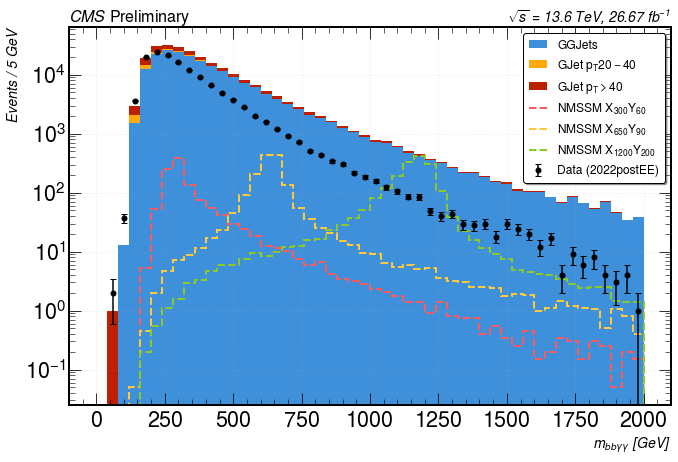

In [25]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from cycler import cycler

# Set CMS style
hep.style.use("CMS")
plt.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "#3f90da", "#ffa90e", "#bd1f01", "#94a4a2",
        "#832db6", "#a96b59", "#e76300", "#b9ac70",
        "#717581", "#92dadd",
    ]
)

# Background files and paths
background_files = [
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GGJets/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt20to40/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/GJetPt40/preselection"),
]

# Signal files and paths
signal_files = [
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_NMSSMv2-trees.root", "/NMSSM_X1200_Y200/preselection"),
]

data_files = [
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/Data_EraE/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/Data_EraF/preselection"),
    ("../../outputfiles/hhbbgg_analyzer_v2-trees.root", "/Data_EraG/preselection"),
    
]
# Columns to be loaded
keys = ['bbgg_mass', 'dibjet_mass', 'diphoton_mass']

# Load DataFrames for background and signal
dfs_background = {}
dfs_signal = {}

for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs_background[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

for file, key in signal_files:
    try:
        with uproot.open(file) as f:
            dfs_signal[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")
        
# Load DataFrames for data
dfs_data = {}

for file, key in data_files:
    try:
        with uproot.open(file) as f:
            dfs_data[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")


# Overlay histograms for 'bbgg_mass'
variable = 'bbgg_mass'
bins = np.linspace(0, 2000, 51)  # Define bins (edges from 0 to 2000 GeV)
labels_background = [
    r"GGJets",
    r"GJet $p_{T} 20-40$",
    r"GJet $p_{T} > 40$",
]  # Labels for background datasets
labels_signal = [
    r"NMSSM $X_{300}Y_{60}$",
    r"NMSSM $X_{650}Y_{90}$",
    r"NMSSM $X_{1200}Y_{200}$",
]  # Labels for signal datasets

# Prepare background data for stacking
stacked_counts = []
for idx, (key, df) in enumerate(dfs_background.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, _ = np.histogram(data, bins=bins)  # Bin the data
    stacked_counts.append(counts)

# Plot stacked histograms for background
plt.figure(figsize=(10, 7))

hep.histplot(
    stacked_counts,
    bins=bins,
    histtype='fill',  # Use filled bars for the stacked plot
    stack=True,  # Enable stacking
    linewidth=0.5,
    label=labels_background  # Add labels for the background datasets
)

# Define a color list for signal histograms with brighter, more contrasting colors
signal_colors = ["#ff595e", "#ffca3a", "#8ac926"]  # Brighter colors for better contrast

# Scale the signal histograms and overlay them
scaling_factor = 0.05  # Adjust scaling factor for signal visibility
for idx, (key, df) in enumerate(dfs_signal.items()):
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, bin_edges = np.histogram(data, bins=bins)  # Bin the data
    scaled_counts = counts * scaling_factor  # Scale the signal counts
    hep.histplot(
        scaled_counts,
        bins=bin_edges,
        histtype='step',  # Overlay signal with steps
        color=signal_colors[idx % len(signal_colors)],  # Explicit color for signal
        label=labels_signal[idx],
        linewidth=2,
        linestyle='--',  # Dashed line for signal histograms
    )
# Overlay data histograms in black
data_label = r"Data (2022postEE)"
data_combined = np.zeros_like(bins[:-1])  # Initialize combined histogram for data

# Combine data from all eras
for key, df in dfs_data.items():
    data = df[variable].to_numpy()  # Convert to numpy array for histogramming
    counts, _ = np.histogram(data, bins=bins)  # Bin the data
    data_combined += counts  # Sum up counts for all data eras
    
# Plot the combined data
plt.errorbar(
    bins[:-1] + np.diff(bins) / 2,  # Bin centers
    data_combined,
    yerr=np.sqrt(data_combined),  # Poisson errors
    fmt='o',  # Circular markers for data
    color='black',  # Black color for data
    label=data_label,
    markersize=5,
    capsize=3,
)

# CMS Style Annotations
plt.title(r"$\mathit{CMS}$ Preliminary", loc="left", fontsize=16)  # CMS in italic
plt.title(r"$\sqrt{s}$ = 13.6 TeV, 26.67 fb$^{-1}$", loc="right", fontsize=14, style='italic')  # Luminosity in italic

plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14, style='italic')  # Italic x-label
plt.ylabel("Events / 5 GeV", fontsize=14, style='italic')  # Italic y-label

# Set log scale
plt.yscale('log')

# Legend with a box
plt.legend(fontsize=12, loc="upper right", fancybox=True, edgecolor="black", frameon=True, shadow=True)

# Add grid with reduced alpha for a more subtle effect
plt.grid(True, alpha=0.3)

plt.tight_layout()

# # Save the figure
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/bbgg__mass_stacked_background_overlay_signal_log_optimized_with_data.png")  # Save as PNG
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/higgsdna_v2/bbgg__mass_stacked_background_overlay_signal_log_optimized_with_data.pdf")  # Save as PDF
plt.show()
